In [9]:
# import the necessary packages
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import json
home_path = os.getcwd().replace('BC1/notebooks','')

In [10]:
with open("separate_BC.json", "r") as read_file:
    json_file = json.load(read_file)

In [11]:
name_json = json_file["file_name"]
split = name_json.split('.')
run_number = split[1][2:7]

In [12]:
path= home_path+'BC1/analysis/CS'+run_number+'F/separate_cells_BC/'

In [13]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [73]:
def compare_images(imageA, imageB , path = path):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

    # setup the figure
    fig = plt.figure(figsize=(15, 8))
    plt.title("# DataB vs. DataC ", fontsize = 25)
    plt.axis("off")
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s), fontsize = 15)

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    plt.savefig(path+'compare_images_ssim.png', bbox_inches='tight')
    # show the images

<Figure size 432x288 with 0 Axes>

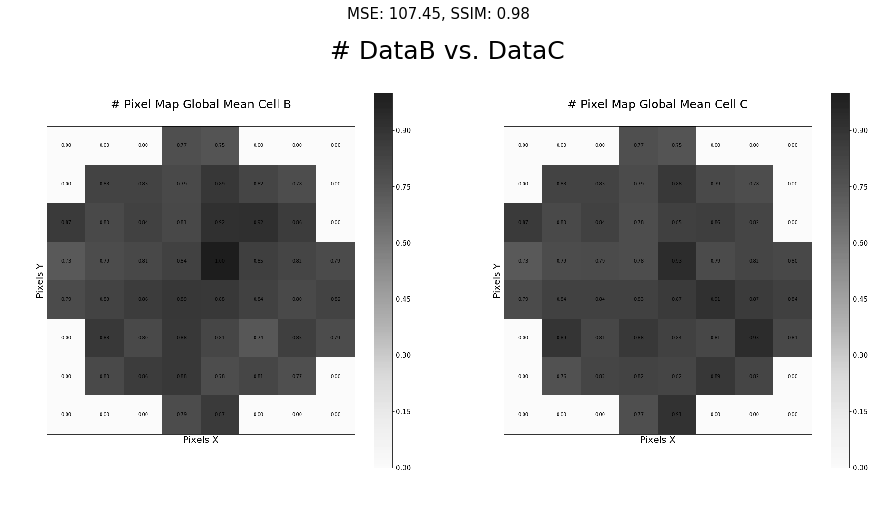

In [74]:
# load the images -- the original, the original + contrast,

dataB = cv2.imread(path+"DataB/Image_Global_Mean_CellB.png")
dataC = cv2.imread(path+"DataC/Image_Global_Mean_CellC.png")


# convert the images to grayscale
dataB = cv2.cvtColor(dataB, cv2.COLOR_BGR2GRAY)
dataC = cv2.cvtColor(dataC, cv2.COLOR_BGR2GRAY)


# initialize the figure
fig = plt.figure("Images")
images = ("DataB", dataB), ("DataC",dataC)


# compare the images

compare_images(dataB, dataC)
